In [301]:
import numpy as np
import matplotlib as mpl
import pandas as pd

import matplotlib.pyplot as plt

In [317]:
data_dir = '../data/'
fig_dir = '../figures/'

red_shades = ['#FF6666', '#DC143C', '#8B0000']
green_shades = ['#90EE90', '#228B22', '#006400']

# Chapter 6: Comparison Study Plots

## Case 1: Poisson Equation

In [318]:
# Import data
data_elliptic_forest_adaptive = pd.read_csv(data_dir + 'case01-elliptic-forest-adaptive.csv')
data_elliptic_forest_uniform = pd.read_csv(data_dir + 'case01-elliptic-forest-uniform.csv')
data_thunderegg_adaptive = pd.read_csv(data_dir + 'case01-thunderegg-adaptive.csv')
data_petsc_cg_bjacobi_uniform = pd.read_csv(data_dir + 'case01-petsc-cg-bjacobi-uniform.csv')
data_petsc_cg_gamg_uniform = pd.read_csv(data_dir + 'case01-petsc-cg-gamg-uniform.csv')
data_petsc_gmres_bjacobi_uniform = pd.read_csv(data_dir + 'case01-petsc-gmres-bjacobi-uniform.csv')
data_petsc_gmres_gamg_uniform = pd.read_csv(data_dir + 'case01-petsc-gmres-gamg-uniform.csv')

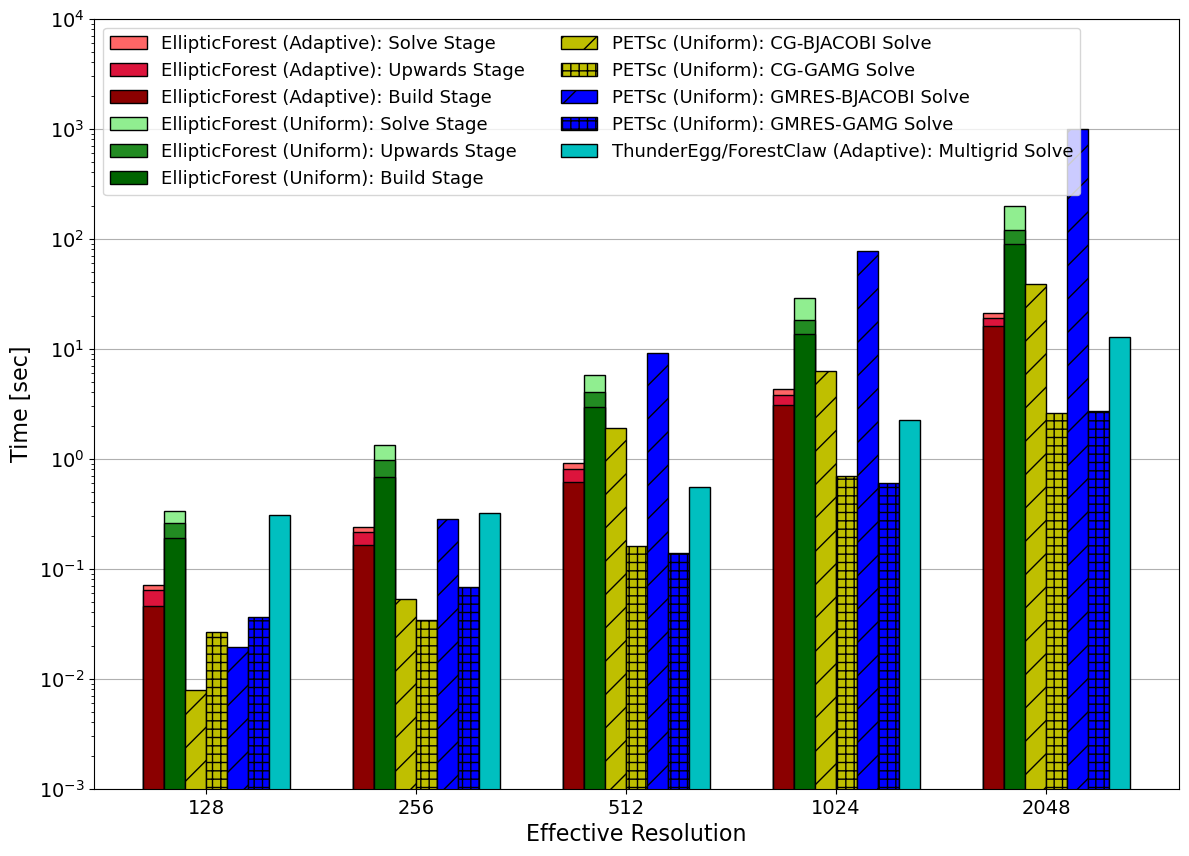

In [322]:
ef_adaptive_build_time = np.array(data_elliptic_forest_adaptive['build_time'])
ef_adaptive_upwards_time = np.array(data_elliptic_forest_adaptive['upwards_time'])
ef_adaptive_solve_time = np.array(data_elliptic_forest_adaptive['solve_time'])

ef_uniform_build_time = np.array(data_elliptic_forest_uniform['build_time'])
ef_uniform_upwards_time = np.array(data_elliptic_forest_uniform['upwards_time'])
ef_uniform_solve_time = np.array(data_elliptic_forest_uniform['solve_time'])

te_adaptive_solve_time = np.array(data_thunderegg_adaptive['elliptic_solve'])

petsc_cg_bjacobi_uniform_assembly_time = np.array(data_petsc_cg_bjacobi_uniform['assembly_time'])
petsc_cg_bjacobi_uniform_solve_time = np.array(data_petsc_cg_bjacobi_uniform['solve_time'])

petsc_cg_gamg_uniform_assembly_time = np.array(data_petsc_cg_gamg_uniform['assembly_time'])
petsc_cg_gamg_uniform_solve_time = np.array(data_petsc_cg_gamg_uniform['solve_time'])

petsc_gmres_bjacobi_uniform_assembly_time = np.array(data_petsc_gmres_bjacobi_uniform['assembly_time'])
petsc_gmres_bjacobi_uniform_solve_time = np.array(data_petsc_gmres_bjacobi_uniform['solve_time'])

petsc_gmres_gamg_uniform_assembly_time = np.array(data_petsc_gmres_gamg_uniform['assembly_time'])
petsc_gmres_gamg_uniform_solve_time = np.array(data_petsc_gmres_gamg_uniform['solve_time'])

fig, ax = plt.subplots(figsize=(14,10))

width = 0.1
offset = 0

ef_adaptive_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time + ef_adaptive_upwards_time + ef_adaptive_solve_time, 
        color=red_shades[0], edgecolor='k', label='EllipticForest (Adaptive): Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time + ef_adaptive_upwards_time,
        color=red_shades[1], edgecolor='k', label='EllipticForest (Adaptive): Upwards Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time,
        color=red_shades[2], edgecolor='k', label='EllipticForest (Adaptive): Build Stage', align='edge', width=width, log=True
    )
]

offset += width
ef_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_upwards_time + ef_uniform_solve_time, 
        color=green_shades[0], edgecolor='k', label='EllipticForest (Uniform): Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_upwards_time,
        color=green_shades[1], edgecolor='k', label='EllipticForest (Uniform): Upwards Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time,
        color=green_shades[2], edgecolor='k', label='EllipticForest (Uniform): Build Stage', align='edge', width=width, log=True
    )
]

offset += width
petsc_cg_bjacobi_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_cg_bjacobi_uniform_solve_time, 
        color='y', edgecolor='k', hatch='/', label='PETSc (Uniform): CG-BJACOBI Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_cg_gamg_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_cg_gamg_uniform_solve_time, 
        color='y', edgecolor='k', hatch='++', label='PETSc (Uniform): CG-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_bjacobi_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_bjacobi_uniform_solve_time, 
        color='b', edgecolor='k', hatch='/', label='PETSc (Uniform): GMRES-BJACOBI Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_gamg_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_gamg_uniform_solve_time, 
        color='b', edgecolor='k', hatch='++', label='PETSc (Uniform): GMRES-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
te_adaptive_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, te_adaptive_solve_time, 
        color='c', edgecolor='k', label='ThunderEgg/ForestClaw (Adaptive): Multigrid Solve', align='edge', width=width, log=True
    )
]

ax.set_xlabel('Effective Resolution', size=16)
ax.set_xticks(np.array([0, 1, 2, 3, 4]) + 0.3)
ax.set_xticklabels([128, 256, 512, 1024, 2048])

ax.set_ylabel('Time [sec]', size=16)
ax.set_ylim([1e-3, 1e4])

ax.tick_params(axis='both', labelsize=14)

ax.legend(prop={'size':13}, ncol=2, loc='upper left')
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

# ax.set_title('Poisson Equation Solve Comparison')

plt.savefig(fig_dir + 'case01-stacked-bar-plot-comparisons-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case01-stacked-bar-plot-comparisons-no-title.png', bbox_inches='tight')


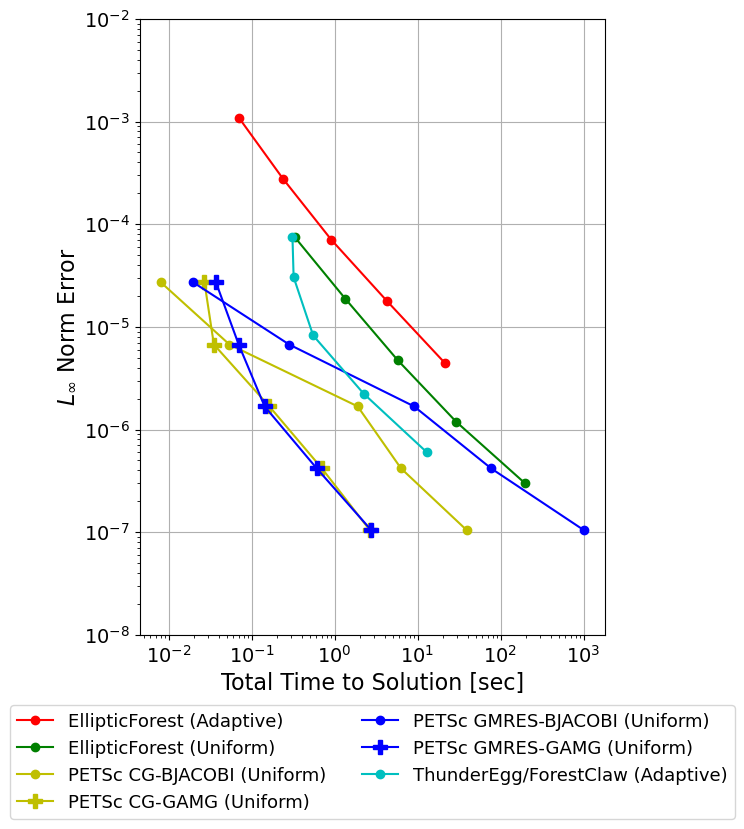

In [320]:
ef_adaptive_l1_error = np.array(data_elliptic_forest_adaptive['l1_error'])
ef_adaptive_l2_error = np.array(data_elliptic_forest_adaptive['l2_error'])
ef_adaptive_lI_error = np.array(data_elliptic_forest_adaptive['lI_error'])
ef_adaptive_total_time = np.array(data_elliptic_forest_adaptive['total_time'])

ef_uniform_l1_error = np.array(data_elliptic_forest_uniform['l1_error'])
ef_uniform_l2_error = np.array(data_elliptic_forest_uniform['l2_error'])
ef_uniform_lI_error = np.array(data_elliptic_forest_uniform['lI_error'])
ef_uniform_total_time = np.array(data_elliptic_forest_uniform['total_time'])

te_adaptive_l1_error = np.array(data_thunderegg_adaptive['l1_error'])
te_adaptive_l2_error = np.array(data_thunderegg_adaptive['l2_error'])
te_adaptive_lI_error = np.array(data_thunderegg_adaptive['lI_error'])
te_adaptive_total_time = np.array(data_thunderegg_adaptive['total_time'])

petsc_cg_bjacobi_uniform_l1_error = np.array(data_petsc_cg_bjacobi_uniform['l1_error'])
petsc_cg_bjacobi_uniform_l2_error = np.array(data_petsc_cg_bjacobi_uniform['l2_error'])
petsc_cg_bjacobi_uniform_lI_error = np.array(data_petsc_cg_bjacobi_uniform['lI_error'])
petsc_cg_bjacobi_uniform_total_time = np.array(data_petsc_cg_bjacobi_uniform['total_time'])

petsc_cg_gamg_uniform_l1_error = np.array(data_petsc_cg_gamg_uniform['l1_error'])
petsc_cg_gamg_uniform_l2_error = np.array(data_petsc_cg_gamg_uniform['l2_error'])
petsc_cg_gamg_uniform_lI_error = np.array(data_petsc_cg_gamg_uniform['lI_error'])
petsc_cg_gamg_uniform_total_time = np.array(data_petsc_cg_gamg_uniform['total_time'])

petsc_gmres_bjacobi_uniform_l1_error = np.array(data_petsc_gmres_bjacobi_uniform['l1_error'])
petsc_gmres_bjacobi_uniform_l2_error = np.array(data_petsc_gmres_bjacobi_uniform['l2_error'])
petsc_gmres_bjacobi_uniform_lI_error = np.array(data_petsc_gmres_bjacobi_uniform['lI_error'])
petsc_gmres_bjacobi_uniform_total_time = np.array(data_petsc_gmres_bjacobi_uniform['total_time'])

petsc_gmres_gamg_uniform_l1_error = np.array(data_petsc_gmres_gamg_uniform['l1_error'])
petsc_gmres_gamg_uniform_l2_error = np.array(data_petsc_gmres_gamg_uniform['l2_error'])
petsc_gmres_gamg_uniform_lI_error = np.array(data_petsc_gmres_gamg_uniform['lI_error'])
petsc_gmres_gamg_uniform_total_time = np.array(data_petsc_gmres_gamg_uniform['total_time'])

fig, ax = plt.subplots(figsize=(6,8))

ax.loglog(ef_adaptive_total_time, ef_adaptive_lI_error, 'r-o', label='EllipticForest (Adaptive)')
ax.loglog(ef_uniform_total_time, ef_uniform_lI_error, 'g-o', label='EllipticForest (Uniform)')
ax.loglog(petsc_cg_bjacobi_uniform_total_time, petsc_cg_bjacobi_uniform_lI_error, 'y-o', label='PETSc CG-BJACOBI (Uniform)')
ax.loglog(petsc_cg_gamg_uniform_total_time, petsc_cg_gamg_uniform_lI_error, 'y-P', ms=10, label='PETSc CG-GAMG (Uniform)')
ax.loglog(petsc_gmres_bjacobi_uniform_total_time, petsc_gmres_bjacobi_uniform_lI_error, 'b-o', label='PETSc GMRES-BJACOBI (Uniform)')
ax.loglog(petsc_gmres_gamg_uniform_total_time, petsc_gmres_gamg_uniform_lI_error, 'b-P', ms=10, label='PETSc GMRES-GAMG (Uniform)')
ax.loglog(te_adaptive_total_time, te_adaptive_lI_error, 'c-o', label='ThunderEgg/ForestClaw (Adaptive)')

ax.set_ylim([1e-8, 1e-2])
ax.set_xlabel('Total Time to Solution [sec]', size=16)
ax.set_ylabel(r'$L_{\infty}$ Norm Error', size=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, prop={'size': 13})
ax.tick_params(axis='both', labelsize=14)
ax.grid()

# plt.suptitle('Work-Precision Plots for Poisson Equation Solve', size=16)
# plt.subplots_adjust(top=0.90)
plt.savefig(fig_dir + 'case01-work-precision-plots-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case01-work-precision-plots-no-title.png', bbox_inches='tight')

## Case 2: Variable Coefficient Poisson Equation

In [323]:
# Import data
data_elliptic_forest_adaptive = pd.read_csv(data_dir + 'case02-elliptic-forest-adaptive.csv')
data_elliptic_forest_uniform = pd.read_csv(data_dir + 'case02-elliptic-forest-uniform.csv')
data_thunderegg_adaptive = pd.read_csv(data_dir + 'case02-thunderegg-adaptive.csv')
data_petsc_gmres_bjacobi_uniform = pd.read_csv(data_dir + 'case02-petsc-gmres-bjacobi-uniform.csv')
data_petsc_gmres_gamg_uniform = pd.read_csv(data_dir + 'case02-petsc-gmres-gamg-uniform.csv')
data_petsc_bcgs_bjacobi_uniform = pd.read_csv(data_dir + 'case02-petsc-bcgs-bjacobi-uniform.csv')
data_petsc_bcgs_gamg_uniform = pd.read_csv(data_dir + 'case02-petsc-bcgs-gamg-uniform.csv')

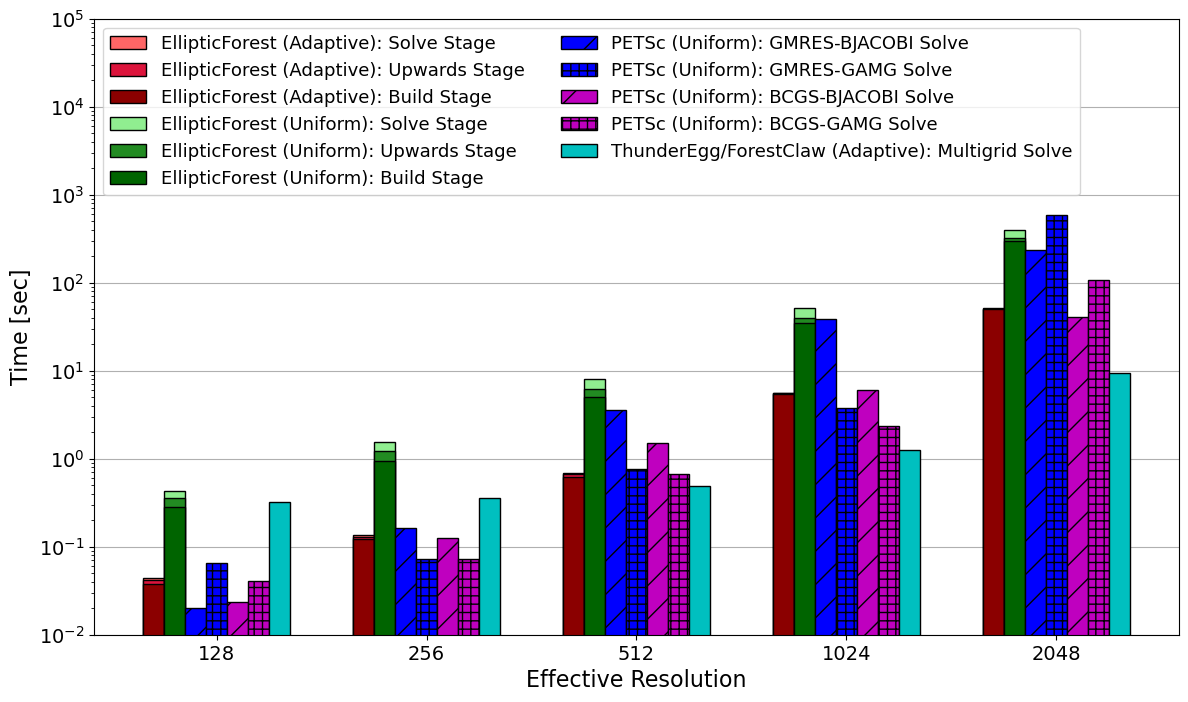

In [331]:
ef_adaptive_build_time = np.array(data_elliptic_forest_adaptive['build_time'])
ef_adaptive_upwards_time = np.array(data_elliptic_forest_adaptive['upwards_time'])
ef_adaptive_solve_time = np.array(data_elliptic_forest_adaptive['solve_time'])

ef_uniform_build_time = np.array(data_elliptic_forest_uniform['build_time'])
ef_uniform_upwards_time = np.array(data_elliptic_forest_uniform['upwards_time'])
ef_uniform_solve_time = np.array(data_elliptic_forest_uniform['solve_time'])

te_adaptive_solve_time = np.array(data_thunderegg_adaptive['elliptic_solve'])

petsc_gmres_bjacobi_uniform_assembly_time = np.array(data_petsc_gmres_bjacobi_uniform['assembly_time'])
petsc_gmres_bjacobi_uniform_solve_time = np.array(data_petsc_gmres_bjacobi_uniform['solve_time'])

petsc_gmres_gamg_uniform_assembly_time = np.array(data_petsc_gmres_gamg_uniform['assembly_time'])
petsc_gmres_gamg_uniform_solve_time = np.array(data_petsc_gmres_gamg_uniform['solve_time'])

petsc_bcgs_bjacobi_uniform_assembly_time = np.array(data_petsc_bcgs_bjacobi_uniform['assembly_time'])
petsc_bcgs_bjacobi_uniform_solve_time = np.array(data_petsc_bcgs_bjacobi_uniform['solve_time'])

petsc_bcgs_gamg_uniform_assembly_time = np.array(data_petsc_bcgs_gamg_uniform['assembly_time'])
petsc_bcgs_gamg_uniform_solve_time = np.array(data_petsc_bcgs_gamg_uniform['solve_time'])

fig, ax = plt.subplots(figsize=(14,8))

width = 0.1
offset = 0

ef_adaptive_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time + ef_adaptive_upwards_time + ef_adaptive_solve_time, 
        color=red_shades[0], edgecolor='k', label='EllipticForest (Adaptive): Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time + ef_adaptive_upwards_time,
        color=red_shades[1], edgecolor='k', label='EllipticForest (Adaptive): Upwards Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_adaptive_build_time,
        color=red_shades[2], edgecolor='k', label='EllipticForest (Adaptive): Build Stage', align='edge', width=width, log=True
    )
]

offset += width
ef_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_upwards_time + ef_uniform_solve_time, 
        color=green_shades[0], edgecolor='k', label='EllipticForest (Uniform): Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_upwards_time,
        color=green_shades[1], edgecolor='k', label='EllipticForest (Uniform): Upwards Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time,
        color=green_shades[2], edgecolor='k', label='EllipticForest (Uniform): Build Stage', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_bjacobi_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_bjacobi_uniform_solve_time, 
        color='b', edgecolor='k', hatch='/', label='PETSc (Uniform): GMRES-BJACOBI Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_gamg_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_gamg_uniform_solve_time, 
        color='b', edgecolor='k', hatch='++', label='PETSc (Uniform): GMRES-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_bcgs_bjacobi_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_bcgs_bjacobi_uniform_solve_time, 
        color='m', edgecolor='k', hatch='/', label='PETSc (Uniform): BCGS-BJACOBI Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_bcgs_gamg_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_bcgs_gamg_uniform_solve_time, 
        color='m', edgecolor='k', hatch='++', label='PETSc (Uniform): BCGS-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
te_adaptive_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, te_adaptive_solve_time, 
        color='c', edgecolor='k', label='ThunderEgg/ForestClaw (Adaptive): Multigrid Solve', align='edge', width=width, log=True
    )
]

ax.set_xlabel('Effective Resolution', size=16)
ax.set_xticks(np.array([0, 1, 2, 3, 4]) + 0.35)
ax.set_xticklabels([128, 256, 512, 1024, 2048])

ax.set_ylabel('Time [sec]', size=16)
ax.set_ylim([1e-2, 1e5])
ax.tick_params(axis='both', labelsize=14)

ax.legend(prop={'size':13}, ncols=2, loc='upper left')
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

# ax.set_title('Variable Poisson Equation Solve Comparison')

plt.savefig(fig_dir + 'case02-stacked-bar-plot-comparisons-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case02-stacked-bar-plot-comparisons-no-title.png', bbox_inches='tight')


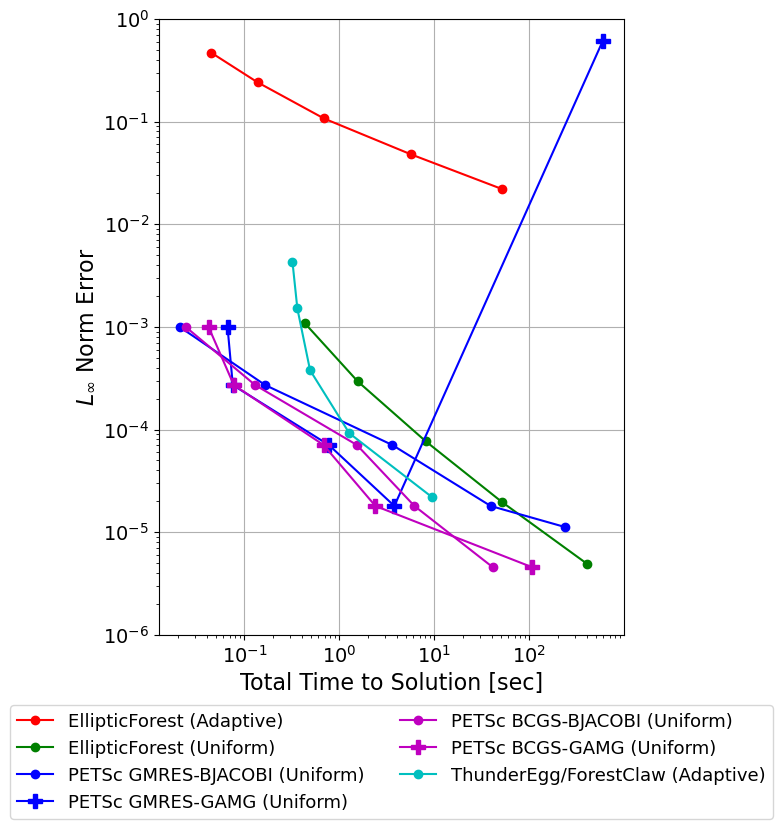

In [332]:
ef_adaptive_l1_error = np.array(data_elliptic_forest_adaptive['l1_error'])
ef_adaptive_l2_error = np.array(data_elliptic_forest_adaptive['l2_error'])
ef_adaptive_lI_error = np.array(data_elliptic_forest_adaptive['lI_error'])
ef_adaptive_total_time = np.array(data_elliptic_forest_adaptive['total_time'])

ef_uniform_l1_error = np.array(data_elliptic_forest_uniform['l1_error'])
ef_uniform_l2_error = np.array(data_elliptic_forest_uniform['l2_error'])
ef_uniform_lI_error = np.array(data_elliptic_forest_uniform['lI_error'])
ef_uniform_total_time = np.array(data_elliptic_forest_uniform['total_time'])

te_adaptive_l1_error = np.array(data_thunderegg_adaptive['l1_error'])
te_adaptive_l2_error = np.array(data_thunderegg_adaptive['l2_error'])
te_adaptive_lI_error = np.array(data_thunderegg_adaptive['lI_error'])
te_adaptive_total_time = np.array(data_thunderegg_adaptive['total_time'])

petsc_gmres_bjacobi_uniform_l1_error = np.array(data_petsc_gmres_bjacobi_uniform['l1_error'])
petsc_gmres_bjacobi_uniform_l2_error = np.array(data_petsc_gmres_bjacobi_uniform['l2_error'])
petsc_gmres_bjacobi_uniform_lI_error = np.array(data_petsc_gmres_bjacobi_uniform['lI_error'])
petsc_gmres_bjacobi_uniform_total_time = np.array(data_petsc_gmres_bjacobi_uniform['total_time'])

petsc_gmres_gamg_uniform_l1_error = np.array(data_petsc_gmres_gamg_uniform['l1_error'])
petsc_gmres_gamg_uniform_l2_error = np.array(data_petsc_gmres_gamg_uniform['l2_error'])
petsc_gmres_gamg_uniform_lI_error = np.array(data_petsc_gmres_gamg_uniform['lI_error'])
petsc_gmres_gamg_uniform_total_time = np.array(data_petsc_gmres_gamg_uniform['total_time'])

petsc_bcgs_bjacobi_uniform_l1_error = np.array(data_petsc_bcgs_bjacobi_uniform['l1_error'])
petsc_bcgs_bjacobi_uniform_l2_error = np.array(data_petsc_bcgs_bjacobi_uniform['l2_error'])
petsc_bcgs_bjacobi_uniform_lI_error = np.array(data_petsc_bcgs_bjacobi_uniform['lI_error'])
petsc_bcgs_bjacobi_uniform_total_time = np.array(data_petsc_bcgs_bjacobi_uniform['total_time'])

petsc_bcgs_gamg_uniform_l1_error = np.array(data_petsc_bcgs_gamg_uniform['l1_error'])
petsc_bcgs_gamg_uniform_l2_error = np.array(data_petsc_bcgs_gamg_uniform['l2_error'])
petsc_bcgs_gamg_uniform_lI_error = np.array(data_petsc_bcgs_gamg_uniform['lI_error'])
petsc_bcgs_gamg_uniform_total_time = np.array(data_petsc_bcgs_gamg_uniform['total_time'])

fig, ax = plt.subplots(figsize=(6,8))

ax.loglog(ef_adaptive_total_time, ef_adaptive_lI_error, 'r-o', label='EllipticForest (Adaptive)')
ax.loglog(ef_uniform_total_time, ef_uniform_lI_error, 'g-o', label='EllipticForest (Uniform)')
ax.loglog(petsc_gmres_bjacobi_uniform_total_time, petsc_gmres_bjacobi_uniform_lI_error, 'b-o', label='PETSc GMRES-BJACOBI (Uniform)')
ax.loglog(petsc_gmres_gamg_uniform_total_time, petsc_gmres_gamg_uniform_lI_error, 'b-P', ms=10, label='PETSc GMRES-GAMG (Uniform)')
ax.loglog(petsc_bcgs_bjacobi_uniform_total_time, petsc_bcgs_bjacobi_uniform_lI_error, 'm-o', label='PETSc BCGS-BJACOBI (Uniform)')
ax.loglog(petsc_bcgs_gamg_uniform_total_time, petsc_bcgs_gamg_uniform_lI_error, 'm-P', ms=10, label='PETSc BCGS-GAMG (Uniform)')
ax.loglog(te_adaptive_total_time, te_adaptive_lI_error, 'c-o', label='ThunderEgg/ForestClaw (Adaptive)')

ax.set_ylim([1e-6, 1e0])
ax.set_xlabel('Total Time to Solution [sec]', size=16)
ax.set_ylabel(r'$L_{\infty}$ Norm Error', size=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, prop={'size': 13})
ax.tick_params(axis='both', labelsize=14)
ax.grid()

# plt.suptitle('Work-Precision Plots for Poisson Equation Solve', size=16)
# plt.subplots_adjust(top=0.90)
plt.savefig(fig_dir + 'case02-work-precision-plots-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case02-work-precision-plots-no-title.png', bbox_inches='tight')

## Case 3: High Wavenumber Helmholtz

In [333]:
# Import data
data_elliptic_forest_uniform = pd.read_csv(data_dir + 'case03-elliptic-forest-uniform.csv')
data_petsc_gmres_uniform = pd.read_csv(data_dir + 'case03-petsc-gmres-gamg-uniform.csv')
data_petsc_bcgs_uniform = pd.read_csv(data_dir + 'case03-petsc-bcgs-gamg-uniform.csv')

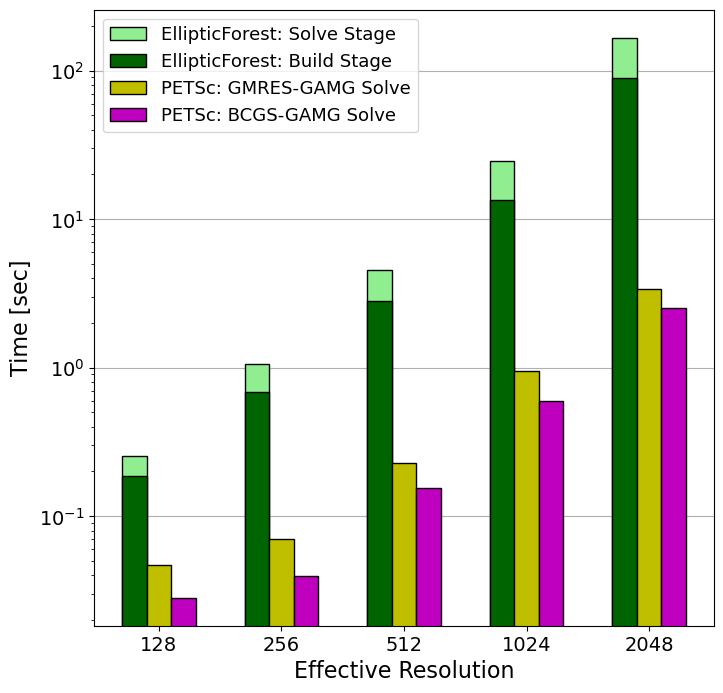

In [337]:
ef_uniform_build_time = np.array(data_elliptic_forest_uniform['build_time'])[0:5]
ef_uniform_upwards_time = np.array(data_elliptic_forest_uniform['upwards_time'])[0:5]
ef_uniform_solve_time = np.array(data_elliptic_forest_uniform['solve_time'])[0:5]

petsc_gmres_uniform_assembly_time = np.array(data_petsc_gmres_uniform['assembly_time'])[0:5]
petsc_gmres_uniform_solve_time = np.array(data_petsc_gmres_uniform['solve_time'])[0:5]

petsc_bcgs_uniform_assembly_time = np.array(data_petsc_bcgs_uniform['assembly_time'])[0:5]
petsc_bcgs_uniform_solve_time = np.array(data_petsc_bcgs_uniform['solve_time'])[0:5]

fig, ax = plt.subplots(figsize=(8,8))

width = 0.2
offset = 0

offset += width
ef_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_solve_time, 
        color=green_shades[0], edgecolor='k', label='EllipticForest: Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time,
        color=green_shades[2], edgecolor='k', label='EllipticForest: Build Stage', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_uniform_solve_time, 
        color='y', edgecolor='k', label='PETSc: GMRES-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_bcgs_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_bcgs_uniform_solve_time, 
        color='m', edgecolor='k', label='PETSc: BCGS-GAMG Solve', align='edge', width=width, log=True
    )
]

ax.set_xlabel('Effective Resolution', size=16)
ax.set_xticks(np.array([0, 1, 2, 3, 4]) + 0.5)
ax.set_xticklabels([128, 256, 512, 1024, 2048])

ax.set_ylabel('Time [sec]', size=16)
ax.tick_params(axis='both', labelsize=14)

ax.legend(prop={'size':13})
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

# ax.set_title(r'Helmholtz Equation Comparison $(\lambda=1)$')

plt.savefig(fig_dir + 'case03-l1-stacked-bar-plot-comparisons-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case03-l1-stacked-bar-plot-comparisons-no-title.png', bbox_inches='tight')


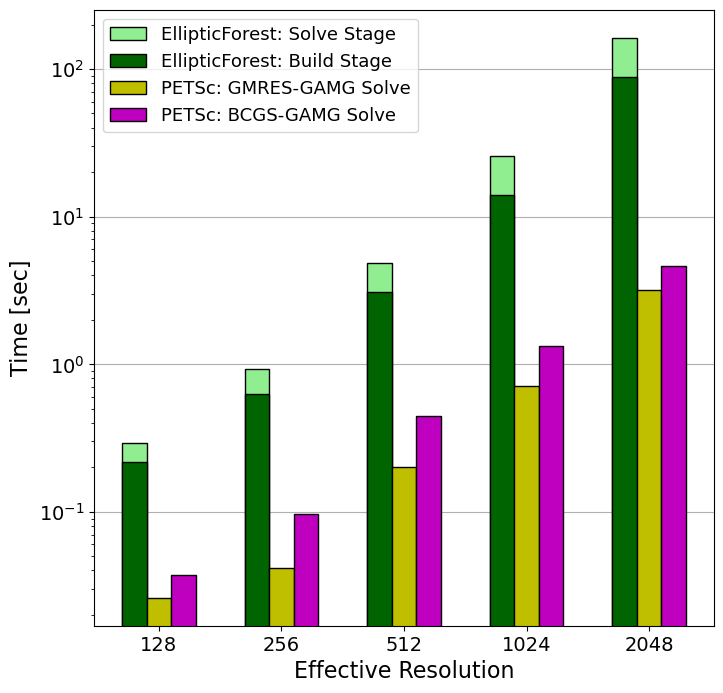

In [338]:
ef_uniform_build_time = np.array(data_elliptic_forest_uniform['build_time'])[5:10]
ef_uniform_upwards_time = np.array(data_elliptic_forest_uniform['upwards_time'])[5:10]
ef_uniform_solve_time = np.array(data_elliptic_forest_uniform['solve_time'])[5:10]

petsc_gmres_uniform_assembly_time = np.array(data_petsc_gmres_uniform['assembly_time'])[5:10]
petsc_gmres_uniform_solve_time = np.array(data_petsc_gmres_uniform['solve_time'])[5:10]

petsc_bcgs_uniform_assembly_time = np.array(data_petsc_bcgs_uniform['assembly_time'])[5:10]
petsc_bcgs_uniform_solve_time = np.array(data_petsc_bcgs_uniform['solve_time'])[5:10]

fig, ax = plt.subplots(figsize=(8,8))

width = 0.2
offset = 0

offset += width
ef_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_solve_time, 
        color=green_shades[0], edgecolor='k', label='EllipticForest: Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time,
        color=green_shades[2], edgecolor='k', label='EllipticForest: Build Stage', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_uniform_solve_time, 
        color='y', edgecolor='k', label='PETSc: GMRES-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_bcgs_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_bcgs_uniform_solve_time, 
        color='m', edgecolor='k', label='PETSc: BCGS-GAMG Solve', align='edge', width=width, log=True
    )
]

ax.set_xlabel('Effective Resolution', size=16)
ax.set_xticks(np.array([0, 1, 2, 3, 4]) + 0.5)
ax.set_xticklabels([128, 256, 512, 1024, 2048])

ax.set_ylabel('Time [sec]', size=16)
ax.tick_params(axis='both', labelsize=14)

ax.legend(prop={'size':13})
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

# ax.set_title(r'Helmholtz Equation Comparison $(\lambda=10)$')

plt.savefig(fig_dir + 'case03-l10-stacked-bar-plot-comparisons-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case03-l10-stacked-bar-plot-comparisons-no-title.png', bbox_inches='tight')


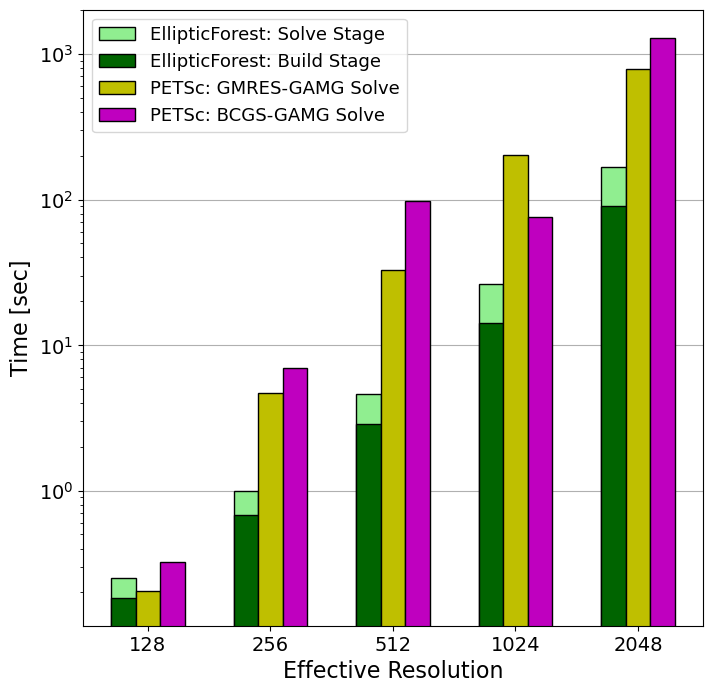

In [339]:
ef_uniform_build_time = np.array(data_elliptic_forest_uniform['build_time'])[10:15]
ef_uniform_upwards_time = np.array(data_elliptic_forest_uniform['upwards_time'])[10:15]
ef_uniform_solve_time = np.array(data_elliptic_forest_uniform['solve_time'])[10:15]

petsc_gmres_uniform_assembly_time = np.array(data_petsc_gmres_uniform['assembly_time'])[10:15]
petsc_gmres_uniform_solve_time = np.array(data_petsc_gmres_uniform['solve_time'])[10:15]

petsc_bcgs_uniform_assembly_time = np.array(data_petsc_bcgs_uniform['assembly_time'])[10:15]
petsc_bcgs_uniform_solve_time = np.array(data_petsc_bcgs_uniform['solve_time'])[10:15]

fig, ax = plt.subplots(figsize=(8,8))

width = 0.2
offset = 0

offset += width
ef_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_solve_time, 
        color=green_shades[0], edgecolor='k', label='EllipticForest: Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time,
        color=green_shades[2], edgecolor='k', label='EllipticForest: Build Stage', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_gmres_uniform_solve_time, 
        color='y', edgecolor='k', label='PETSc: GMRES-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_bcgs_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, petsc_bcgs_uniform_solve_time, 
        color='m', edgecolor='k', label='PETSc: BCGS-GAMG Solve', align='edge', width=width, log=True
    )
]

ax.set_xlabel('Effective Resolution', size=16)
ax.set_xticks(np.array([0, 1, 2, 3, 4]) + 0.5)
ax.set_xticklabels([128, 256, 512, 1024, 2048])

ax.set_ylabel('Time [sec]', size=16)
ax.tick_params(axis='both', labelsize=14)

ax.legend(prop={'size':13})
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

# ax.set_title(r'Helmholtz Equation Comparison $(\lambda=100)$')

plt.savefig(fig_dir + 'case03-l100-stacked-bar-plot-comparisons-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case03-l100-stacked-bar-plot-comparisons-no-title.png', bbox_inches='tight')


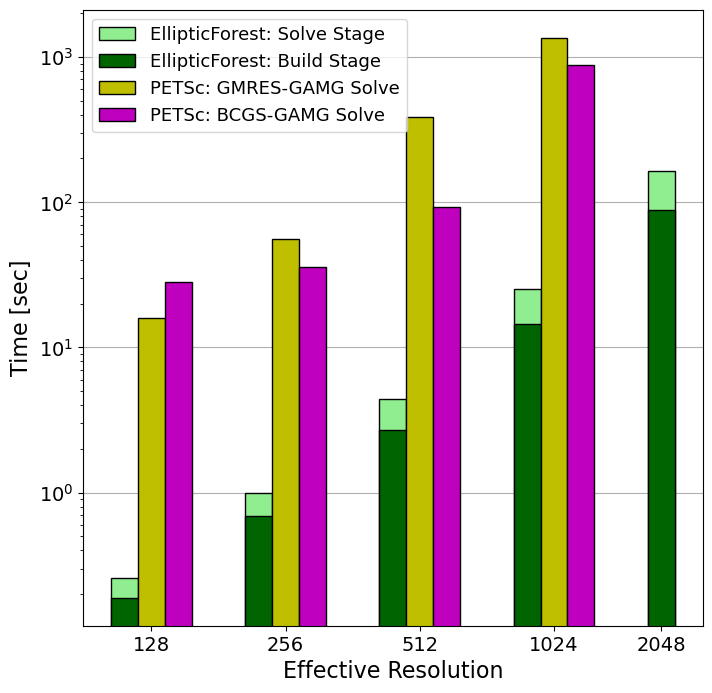

In [341]:
ef_uniform_build_time = np.array(data_elliptic_forest_uniform['build_time'])[15:20]
ef_uniform_upwards_time = np.array(data_elliptic_forest_uniform['upwards_time'])[15:20]
ef_uniform_solve_time = np.array(data_elliptic_forest_uniform['solve_time'])[15:20]

petsc_gmres_uniform_assembly_time = np.array(data_petsc_gmres_uniform['assembly_time'])[15:19]
petsc_gmres_uniform_solve_time = np.array(data_petsc_gmres_uniform['solve_time'])[15:19]

petsc_bcgs_uniform_assembly_time = np.array(data_petsc_bcgs_uniform['assembly_time'])[15:19]
petsc_bcgs_uniform_solve_time = np.array(data_petsc_bcgs_uniform['solve_time'])[15:19]

fig, ax = plt.subplots(figsize=(8,8))

width = 0.2
offset = 0

offset += width
ef_uniform_bars = [
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time + ef_uniform_solve_time, 
        color=green_shades[0], edgecolor='k', label='EllipticForest: Solve Stage', align='edge', width=width, log=True
    ),
    ax.bar(
        np.array([0, 1, 2, 3, 4]) + offset, ef_uniform_build_time,
        color=green_shades[2], edgecolor='k', label='EllipticForest: Build Stage', align='edge', width=width, log=True
    )
]

offset += width
petsc_gmres_bars = [
    ax.bar(
        np.array([0, 1, 2, 3]) + offset, petsc_gmres_uniform_solve_time, 
        color='y', edgecolor='k', label='PETSc: GMRES-GAMG Solve', align='edge', width=width, log=True
    )
]

offset += width
petsc_bcgs_bars = [
    ax.bar(
        np.array([0, 1, 2, 3]) + offset, petsc_bcgs_uniform_solve_time, 
        color='m', edgecolor='k', label='PETSc: BCGS-GAMG Solve', align='edge', width=width, log=True
    )
]

ax.set_xlabel('Effective Resolution', size=16)
ax.set_xticks(np.array([0, 1, 2, 3, 4-width]) + 0.5)
ax.set_xticklabels([128, 256, 512, 1024, 2048])

ax.set_ylabel('Time [sec]', size=16)
ax.tick_params(axis='both', labelsize=14)

ax.legend(prop={'size':13})
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

# ax.set_title(r'Helmholtz Equation Comparison $(\lambda=1000)$')

plt.savefig(fig_dir + 'case03-l1000-stacked-bar-plot-comparisons-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case03-l1000-stacked-bar-plot-comparisons-no-title.png', bbox_inches='tight')


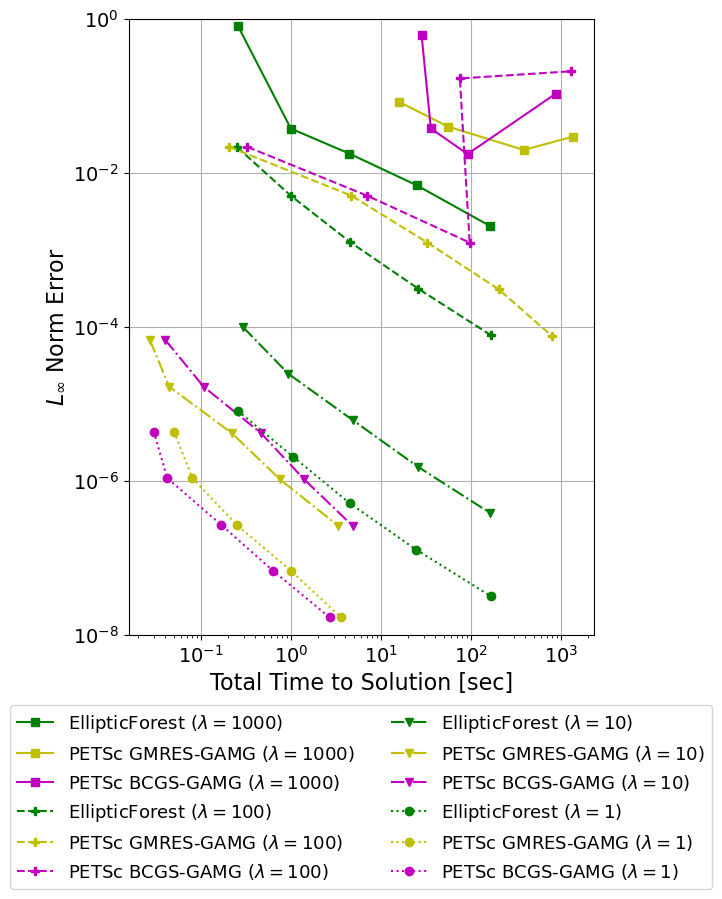

In [296]:
ef_uniform_l1_error_l1 = np.array(data_elliptic_forest_uniform['l1_error'])[0:5]
ef_uniform_l2_error_l1 = np.array(data_elliptic_forest_uniform['l2_error'])[0:5]
ef_uniform_lI_error_l1 = np.array(data_elliptic_forest_uniform['lI_error'])[0:5]
ef_uniform_total_time_l1 = np.array(data_elliptic_forest_uniform['total_time'])[0:5]

petsc_gmres_uniform_l1_error_l1 = np.array(data_petsc_gmres_uniform['l1_error'])[0:5]
petsc_gmres_uniform_l2_error_l1 = np.array(data_petsc_gmres_uniform['l2_error'])[0:5]
petsc_gmres_uniform_lI_error_l1 = np.array(data_petsc_gmres_uniform['lI_error'])[0:5]
petsc_gmres_uniform_total_time_l1 = np.array(data_petsc_gmres_uniform['total_time'])[0:5]

petsc_bcgs_uniform_l1_error_l1 = np.array(data_petsc_bcgs_uniform['l1_error'])[0:5]
petsc_bcgs_uniform_l2_error_l1 = np.array(data_petsc_bcgs_uniform['l2_error'])[0:5]
petsc_bcgs_uniform_lI_error_l1 = np.array(data_petsc_bcgs_uniform['lI_error'])[0:5]
petsc_bcgs_uniform_total_time_l1 = np.array(data_petsc_bcgs_uniform['total_time'])[0:5]

ef_uniform_l1_error_l10 = np.array(data_elliptic_forest_uniform['l1_error'])[5:10]
ef_uniform_l2_error_l10 = np.array(data_elliptic_forest_uniform['l2_error'])[5:10]
ef_uniform_lI_error_l10 = np.array(data_elliptic_forest_uniform['lI_error'])[5:10]
ef_uniform_total_time_l10 = np.array(data_elliptic_forest_uniform['total_time'])[5:10]

petsc_gmres_uniform_l1_error_l10 = np.array(data_petsc_gmres_uniform['l1_error'])[5:10]
petsc_gmres_uniform_l2_error_l10 = np.array(data_petsc_gmres_uniform['l2_error'])[5:10]
petsc_gmres_uniform_lI_error_l10 = np.array(data_petsc_gmres_uniform['lI_error'])[5:10]
petsc_gmres_uniform_total_time_l10 = np.array(data_petsc_gmres_uniform['total_time'])[5:10]

petsc_bcgs_uniform_l1_error_l10 = np.array(data_petsc_bcgs_uniform['l1_error'])[5:10]
petsc_bcgs_uniform_l2_error_l10 = np.array(data_petsc_bcgs_uniform['l2_error'])[5:10]
petsc_bcgs_uniform_lI_error_l10 = np.array(data_petsc_bcgs_uniform['lI_error'])[5:10]
petsc_bcgs_uniform_total_time_l10 = np.array(data_petsc_bcgs_uniform['total_time'])[5:10]

ef_uniform_l1_error_l100 = np.array(data_elliptic_forest_uniform['l1_error'])[10:15]
ef_uniform_l2_error_l100 = np.array(data_elliptic_forest_uniform['l2_error'])[10:15]
ef_uniform_lI_error_l100 = np.array(data_elliptic_forest_uniform['lI_error'])[10:15]
ef_uniform_total_time_l100 = np.array(data_elliptic_forest_uniform['total_time'])[10:15]

petsc_gmres_uniform_l1_error_l100 = np.array(data_petsc_gmres_uniform['l1_error'])[10:15]
petsc_gmres_uniform_l2_error_l100 = np.array(data_petsc_gmres_uniform['l2_error'])[10:15]
petsc_gmres_uniform_lI_error_l100 = np.array(data_petsc_gmres_uniform['lI_error'])[10:15]
petsc_gmres_uniform_total_time_l100 = np.array(data_petsc_gmres_uniform['total_time'])[10:15]

petsc_bcgs_uniform_l1_error_l100 = np.array(data_petsc_bcgs_uniform['l1_error'])[10:15]
petsc_bcgs_uniform_l2_error_l100 = np.array(data_petsc_bcgs_uniform['l2_error'])[10:15]
petsc_bcgs_uniform_lI_error_l100 = np.array(data_petsc_bcgs_uniform['lI_error'])[10:15]
petsc_bcgs_uniform_total_time_l100 = np.array(data_petsc_bcgs_uniform['total_time'])[10:15]

ef_uniform_l1_error_l1000 = np.array(data_elliptic_forest_uniform['l1_error'])[15:20]
ef_uniform_l2_error_l1000 = np.array(data_elliptic_forest_uniform['l2_error'])[15:20]
ef_uniform_lI_error_l1000 = np.array(data_elliptic_forest_uniform['lI_error'])[15:20]
ef_uniform_total_time_l1000 = np.array(data_elliptic_forest_uniform['total_time'])[15:20]

petsc_gmres_uniform_l1_error_l1000 = np.array(data_petsc_gmres_uniform['l1_error'])[15:19]
petsc_gmres_uniform_l2_error_l1000 = np.array(data_petsc_gmres_uniform['l2_error'])[15:19]
petsc_gmres_uniform_lI_error_l1000 = np.array(data_petsc_gmres_uniform['lI_error'])[15:19]
petsc_gmres_uniform_total_time_l1000 = np.array(data_petsc_gmres_uniform['total_time'])[15:19]

petsc_bcgs_uniform_l1_error_l1000 = np.array(data_petsc_bcgs_uniform['l1_error'])[15:19]
petsc_bcgs_uniform_l2_error_l1000 = np.array(data_petsc_bcgs_uniform['l2_error'])[15:19]
petsc_bcgs_uniform_lI_error_l1000 = np.array(data_petsc_bcgs_uniform['lI_error'])[15:19]
petsc_bcgs_uniform_total_time_l1000 = np.array(data_petsc_bcgs_uniform['total_time'])[15:19]

fig, ax = plt.subplots(figsize=(6,8))

ax.loglog(ef_uniform_total_time_l1000, ef_uniform_lI_error_l1000, 'g-s', label='EllipticForest $(\lambda=1000)$')
ax.loglog(petsc_gmres_uniform_total_time_l1000, petsc_gmres_uniform_lI_error_l1000, 'y-s', label='PETSc GMRES-GAMG $(\lambda=1000)$')
ax.loglog(petsc_bcgs_uniform_total_time_l1000, petsc_bcgs_uniform_lI_error_l1000, 'm-s', label='PETSc BCGS-GAMG $(\lambda=1000)$')

ax.loglog(ef_uniform_total_time_l100, ef_uniform_lI_error_l100, 'g--P', label='EllipticForest $(\lambda=100)$')
ax.loglog(petsc_gmres_uniform_total_time_l100, petsc_gmres_uniform_lI_error_l100, 'y--P', label='PETSc GMRES-GAMG $(\lambda=100)$')
ax.loglog(petsc_bcgs_uniform_total_time_l100, petsc_bcgs_uniform_lI_error_l100, 'm--P', label='PETSc BCGS-GAMG $(\lambda=100)$')

ax.loglog(ef_uniform_total_time_l10, ef_uniform_lI_error_l10, 'g-.v', label='EllipticForest $(\lambda=10)$')
ax.loglog(petsc_gmres_uniform_total_time_l10, petsc_gmres_uniform_lI_error_l10, 'y-.v', label='PETSc GMRES-GAMG $(\lambda=10)$')
ax.loglog(petsc_bcgs_uniform_total_time_l10, petsc_bcgs_uniform_lI_error_l10, 'm-.v', label='PETSc BCGS-GAMG $(\lambda=10)$')

ax.loglog(ef_uniform_total_time_l1, ef_uniform_lI_error_l1, 'g:o', label='EllipticForest $(\lambda=1)$')
ax.loglog(petsc_gmres_uniform_total_time_l1, petsc_gmres_uniform_lI_error_l1, 'y:o', label='PETSc GMRES-GAMG $(\lambda=1)$')
ax.loglog(petsc_bcgs_uniform_total_time_l1, petsc_bcgs_uniform_lI_error_l1, 'm:o', label='PETSc BCGS-GAMG $(\lambda=1)$')

ax.set_ylim([1e-8, 1e0])
ax.set_xlabel('Total Time to Solution [sec]', size=16)
ax.set_ylabel(r'$L_{\infty}$ Norm Error', size=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, prop={'size': 13})
ax.tick_params(axis='both', labelsize=14)
ax.grid()

# ax.set_title(r'Work-Precision Plots for Helmholtz Equation and Varying $\lambda$', size=16)
plt.savefig(fig_dir + 'case03-work-precision-plots-no-title.pdf', bbox_inches='tight')
plt.savefig(fig_dir + 'case03-work-precision-plots-no-title.png', bbox_inches='tight')